In [1]:
data = { 'point1': {
            'lat': 0,
            'long': 0,
            'temp': 0 },
        'point2': {
          'lat': 10,
          'long': 10,
          'temp': 20 },
        'point3' : {
          'lat': 0,
          'long': 10,
          'temp': 10 },
        'point4': {
          'lat': 10,
          'long': 0,
          'temp': 30 } 
}


In [2]:
import pandas as pd
df = pd.DataFrame.from_dict(data, orient='index')
df


,lat,long,temp
point1,0,0,0
point2,10,10,20
point3,0,10,10
point4,10,0,30


c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

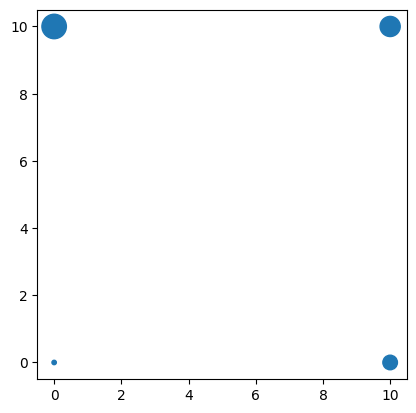

In [3]:
import geopandas as gpd
from shapely.geometry.point import Point
gdf = gpd.GeoDataFrame(df, geometry=[Point(y,x) for x,y in zip(list(df['lat']), list(df['long']))])
gdf.plot(markersize=(gdf['temp']+1)*10)


In [4]:
from scipy.interpolate import interp2d
my_interpolation_function = interp2d(df['lat'], df['long'], df['temp'], kind='linear')


In [5]:
new_points = {'point5': {'lat': 0, 'long': 5},
              'point6': {'lat': 5, 'long': 0},
              'point7': {'lat': 5, 'long': 5},
              'point8': {'lat': 5, 'long': 10},
              'point9': {'lat': 10, 'long': 5}
              }
new_df = pd.DataFrame.from_dict(new_points, orient='index')
new_df


,lat,long
point5,0,5
point6,5,0
point7,5,5
point8,5,10
point9,10,5


In [ ]:
interpolated_temps = []
for i,row in new_df.iterrows():
    interpolated_temps.append(my_interpolation_function(row['lat'], row['long'])[0])

new_df['temp'] = interpolated_temps
new_df


In [ ]:

combi_df = pd.concat([df, new_df])
gdf = gpd.GeoDataFrame(combi_df, geometry=[Point(y,x) for x,y in zip(list(combi_df['lat']), list(combi_df['long']))])
gdf.plot(markersize=(gdf['temp']+1)*10)


In [ ]:
from pykrige.ok import OrdinaryKriging
my_ok = OrdinaryKriging(df['long'], df['lat'], df['temp'])


zvalues, sigmasq = my_ok.execute('points', new_df['long'].map(float).values, new_df['lat'].map(float).values)
new_df['temp'] = zvalues.data
new_df


In [ ]:
combi_df = pd.concat([df, new_df])
gdf = gpd.GeoDataFrame(combi_df, geometry=[Point(y,x) for x,y in zip(list(combi_df['lat']), list(combi_df['long']))])
gdf.plot(markersize=(gdf['temp']+1)*10)


In [ ]:
my_ok = OrdinaryKriging(df['long'], df['lat'], df['temp'], variogram_model = 'gaussian')

zvalues, sigmasq = my_ok.execute('points', new_df['long'].map(float).values, new_df['lat'].map(float).values)
new_df['temp'] = zvalues.data
new_df


In [ ]:
combi_df = pd.concat([df, new_df])
gdf = gpd.GeoDataFrame(combi_df, geometry=[Point(y,x) for x,y in zip(list(combi_df['lat']), list(combi_df['long']))])
gdf.plot(markersize=(gdf['temp']+1)*10)


In [ ]:
my_ok = OrdinaryKriging(df['long'], df['lat'], df['temp'], variogram_model = 'exponential')

zvalues, sigmasq = my_ok.execute('points', new_df['long'].map(float).values, new_df['lat'].map(float).values)
new_df['temp'] = zvalues.data
new_df


In [ ]:
combi_df = pd.concat([df, new_df])
gdf = gpd.GeoDataFrame(combi_df, geometry=[Point(y,x) for x,y in zip(list(combi_df['lat']), list(combi_df['long']))])
gdf.plot(markersize=(gdf['temp']+1)*10)
